# Run this file after sql query (SQL 실행 후 실행합니다.)
## Data load from SQL query and do EDA and then export the file from pandas
## SQL작업 데이터 호출, EDA 후 저장하는 내용입니다.

In [ ]:
# install package if necessary 패키지 설치
!pip install cx_Oracle

In [1]:
import pandas as pd
import cx_Oracle as oci  # data import. it is told that python 3.4 is preferable.

# Go to C:\oraclexe\app\oracle\product\11.2.0\server\network\ADMIN. Then check 'port (1521)' and 'service name(xe)' in 'tnsname.ora'
# use your own information on user and pw.  (user와 pw변수는 각자 맞는 정보로 고쳐서 실행)
user = "DB"
pw = "1234"
dsn = "localhost:1521/xe" 


# connection 연결
con = oci.connect(user=user, password=pw, dsn=dsn)

# cursor 커서
cur = con.cursor()


query = 'select * from FASHION'
df = pd.read_sql_query(query, con)
df

C:\Users\Seward_Shin\AppData\Local\Temp\ipykernel_12552\2673625195.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, con)


,PRODUCTID,SUBCATEGORY,PRODUCTTYPE,COLOUR,USAGE,PRODUCTTITLE,IMAGE,IMAGEURL,GENDER_SIMPLIFIED,FEMALE_SIMPLIFIED,MALE_SIMPLIFIED,CATEGORY_SIMPLIFIED
0,42419,Topwear,Tops,White,Casual,Gini and Jony Girls Knit White Top,42419.jpg,http://assets.myntassets.com/v1/images/style/p...,0,0.0,NaN,1
1,34009,Topwear,Tops,Black,Casual,Gini and Jony Girls Black Top,34009.jpg,http://assets.myntassets.com/v1/images/style/p...,0,0.0,NaN,1
2,40143,Topwear,Tops,Blue,Casual,Gini and Jony Girls Pretty Blossom Blue Top,40143.jpg,http://assets.myntassets.com/v1/images/style/p...,0,0.0,NaN,1
3,23623,Topwear,Tops,Pink,Casual,Doodle Kids Girls Pink I love Shopping Top,23623.jpg,http://assets.myntassets.com/v1/images/style/p...,0,0.0,NaN,1
4,47154,Bottomwear,Capris,Black,Casual,Gini and Jony Girls Black Capris,47154.jpg,http://assets.myntassets.com/v1/images/style/p...,0,0.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2901,51755,Shoes,Casual Shoes,Black,Casual,Catwalk Women Black Shoes,51755.jpg,http://assets.myntassets.com/v1/images/style/p...,0,1.0,NaN,0
2902,47630,Shoes,Flats,Blue,Casual,Carlton London Women Blue Shoes,47630.jpg,http://assets.myntassets.com/v1/images/style/p...,0,1.0,NaN,0
2903,32836,Shoes,Flats,Pink,Casual,Grendha Women Flori Pink Sandals,32836.jpg,http://assets.myntassets.com/v1/images/style/p...,0,1.0,NaN,0
2904,35821,Shoes,Heels,Black,Casual,Enroute Women Black Heels,35821.jpg,http://assets.myntassets.com/v1/images/style/p...,0,1.0,NaN,0


Specified information on labeling of columns is in sql files.  
각 컬럼 레이블링 상세한 의미는 sql파일을 참조한다.  

In [2]:
df.info()   # check if the data is correctly load. 기본 정보 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PRODUCTID            2906 non-null   int64  
 1   SUBCATEGORY          2906 non-null   object 
 2   PRODUCTTYPE          2906 non-null   object 
 3   COLOUR               2906 non-null   object 
 4   USAGE                2906 non-null   object 
 5   PRODUCTTITLE         2906 non-null   object 
 6   IMAGE                2906 non-null   object 
 7   IMAGEURL             2906 non-null   object 
 8   GENDER_SIMPLIFIED    2906 non-null   int64  
 9   FEMALE_SIMPLIFIED    1336 non-null   float64
 10  MALE_SIMPLIFIED      1570 non-null   float64
 11  CATEGORY_SIMPLIFIED  2906 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 272.6+ KB


Note that __FEMALE_SIMPLIFIED__ and __MALE_SIMPLIFIED__ become 'float64' because of null from the different gender.  
9번과 10번컬럼은 다른 성별에 대하여 null값으로 할당되었으므로 float64형태가 되었음을 유의한다.

In [3]:
df.isnull().sum()

PRODUCTID                 0
SUBCATEGORY               0
PRODUCTTYPE               0
COLOUR                    0
USAGE                     0
PRODUCTTITLE              0
IMAGE                     0
IMAGEURL                  0
GENDER_SIMPLIFIED         0
FEMALE_SIMPLIFIED      1570
MALE_SIMPLIFIED        1336
CATEGORY_SIMPLIFIED       0
dtype: int64

The amount of null indicates the different gender. There is no null in the rest columns.  
null값의 양이 서로의 성별의 양을 지칭하고 있다. 나머지 데이터에는 null값이 없다.  

In [4]:
# change the column sequence for convinence purpose. 편의상 컬럼 순서 정렬
df = df[['PRODUCTID','GENDER_SIMPLIFIED', 'FEMALE_SIMPLIFIED','MALE_SIMPLIFIED','CATEGORY_SIMPLIFIED','SUBCATEGORY','PRODUCTTYPE','COLOUR','USAGE','PRODUCTTITLE','IMAGE','IMAGEURL']]

# U.S standard name fix from U.K.  영국이 아닌 미국기준 철자로 변경
df.rename(columns = {'COLOUR':'COLOR'},inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PRODUCTID            2906 non-null   int64  
 1   GENDER_SIMPLIFIED    2906 non-null   int64  
 2   FEMALE_SIMPLIFIED    1336 non-null   float64
 3   MALE_SIMPLIFIED      1570 non-null   float64
 4   CATEGORY_SIMPLIFIED  2906 non-null   int64  
 5   SUBCATEGORY          2906 non-null   object 
 6   PRODUCTTYPE          2906 non-null   object 
 7   COLOR                2906 non-null   object 
 8   USAGE                2906 non-null   object 
 9   PRODUCTTITLE         2906 non-null   object 
 10  IMAGE                2906 non-null   object 
 11  IMAGEURL             2906 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 272.6+ KB


In [5]:
# statistics for numeric data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRODUCTID,2906.0,29229.495526,15527.390981,1636.0,15256.25,34016.5,40769.25,59943.0
GENDER_SIMPLIFIED,2906.0,0.540262,0.498462,0.0,0.00,1.0,1.00,1.0
FEMALE_SIMPLIFIED,1336.0,0.575599,0.494437,0.0,0.00,1.0,1.00,1.0
MALE_SIMPLIFIED,1570.0,0.516561,0.499885,0.0,0.00,1.0,1.00,1.0
CATEGORY_SIMPLIFIED,2906.0,0.456297,0.498172,0.0,0.00,0.0,1.00,1.0


###  Statistics Summary and Found (numeric data only)
* PRODUCT_ID: no need to analyze because it is unique values.    
* The rest columns are moderately well balanced and nothing special.
* CATEGORY_SIMPLIFIED has characteristics that Apparel(0) is Boys/Girls only and Footwear(1) is Men/Women only.

### 데이터 이상유무 (수치데이터 기준)
* PRODUCT_ID: 고유값이므로 분석 대상이 아님에 유의한다.
* 나머지 컬럼들 모두 특별한 점 없이 적절하게 균형잡힌 구성을 보이고 있다.
* Category컬럼의 Apparel(0)은 Boys/Girls로 아동복, Footwear(1)은 Men/Women, 성인 신발을 다루고 있다는 특이점이 있다.

In [6]:
df.describe(include='all').T  # statistics for all data. 문자열 정보를 포함한 경우까지 조회

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PRODUCTID,2906.0,NaN,NaN,NaN,29229.495526,15527.390981,1636.0,15256.25,34016.5,40769.25,59943.0
GENDER_SIMPLIFIED,2906.0,NaN,NaN,NaN,0.540262,0.498462,0.0,0.0,1.0,1.0,1.0
FEMALE_SIMPLIFIED,1336.0,NaN,NaN,NaN,0.575599,0.494437,0.0,0.0,1.0,1.0,1.0
MALE_SIMPLIFIED,1570.0,NaN,NaN,NaN,0.516561,0.499885,0.0,0.0,1.0,1.0,1.0
CATEGORY_SIMPLIFIED,2906.0,NaN,NaN,NaN,0.456297,0.498172,0.0,0.0,0.0,1.0,1.0
SUBCATEGORY,2906,9,Shoes,1306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRODUCTTYPE,2906,31,Tshirts,637,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COLOR,2906,39,Black,578,NaN,NaN,NaN,NaN,NaN,NaN,NaN
USAGE,2906,6,Casual,2447,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRODUCTTITLE,2906,2174,Catwalk Women Black Heels,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###  Statistics Summary and Found (the rest data only)
* SUBCATEGORY: __Shoes__ are the most frequent category out of 9 kinds. Note that each portion of categories is unbalanced.
* PRODUCTTYPE: __Tshirts__ are the most frequent category out of 31 kinds. Note that each portion of kinds is unbalanced.
* COLOR: __Black__ are the most frequent category out of 39 kinds. Note that each portion of colors is unbalanced.
* USAGE: __Casual__ are the most frequent category out of 6 kinds. Its big number(2447) implies unbalcned portions in its column.
* PRODUCTTITLE: __Catwalk Women Black Heels__ are the most frequent category out of 2174 kinds.
  
  
 This result suggests the question of how the title is the same when product ID, image, and imageURL are different. In the example of 'Catwalk Women Black Heels', their 'producttype' is 'Heels', their 'usage' is 'Casual' and their 'color' is 'black' not surprisingly. However, their image files show that their look or design is diverse with the same title.  
  
    
* IMAGE: no need to analyze because it is unique values.    
* IMAGEURL: no need to analyze because it is unique values.  
  
    
Note that those columns can be binary labeled if necessary in the further process. 

### 데이터 이상유무 (문자 데이터 기준)
* SUBCATEGORY: __Shoes__ 가 9가지 분류 중에서 가장 많은 비중을 차지하고 있다. 각 카테고리별 비중은 불균형함에 유의한다.  
* PRODUCTTYPE: __Tshirts__ 가 31가지 분류 중에서 가장 많은 비중을 차지하고 있다. 각 카테고리별 비중은 불균형함에 유의한다.      
* COLOR: __Black__ 가 39가지 분류 중에서 가장 많은 비중을 차지하고 있다. 각 카테고리별 비중은 불균형함에 유의한다.    
* USAGE: __Casual__ 가 6가지 분류 중에서 가장 많은 비중을 차지하고 있다. 2447이라는 큰 숫자가 이미 불균형한 분류를 지니고 있음을 보여준다.
* PRODUCTTITLE: __Catwalk Women Black Heels__ 가 2174 가지 분류 중에서 가장 많은 비중을 차지하고 있다.  
  
이 결과는 PRODUCTID, Image, 그리고 그 URL 고유값이 다 다른데 title이 같을 수가 있냐는 의문을 줄 수 있다. 가장 많은 빈도를 차지한 'Catwalk Women Black Heels'의 경우 producttype, usage, color가 모두 Heels, Casual, Black으로 동일하다. 그러나 이들이 참조하는 각 고유한 이미지 파일은 같은 producttitle이여도 생김새와 그 디자인이 제각각이다.  
    
* IMAGE: 고유값이므로 분석 대상이 아님에 유의한다.    
* IMAGEURL: 고유값이므로 분석 대상이 아님에 유의한다.  
  
이 컬럼들은 뒷 분석과정에서 필요할 때 이진데이터 형태로 추가 변형될 수 있다.

## Correlation Analysis and Multicollinearity  (상관분석, 다중공산성 검토)

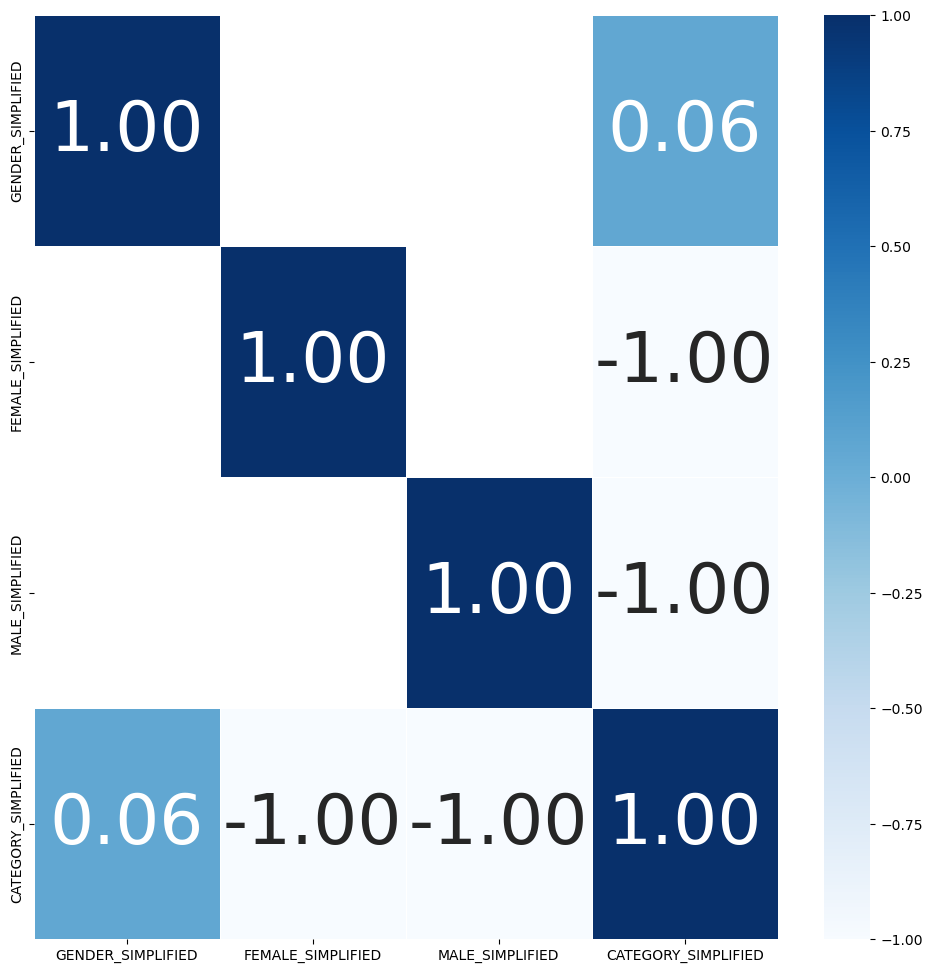

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# define numeric data correlation
df_corr = df[['GENDER_SIMPLIFIED', 'FEMALE_SIMPLIFIED','MALE_SIMPLIFIED','CATEGORY_SIMPLIFIED']].corr()

# visualize correlation by heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df_corr, annot=True, annot_kws = {"size" : 50}, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

* There is no column above 0.5 and thus, there is no multicolinearity.

* 수치 데이터 컬럼중 그 어느것도 0.5 이상인 것은 없으며 그나마 높은 것도 자기 자신을 제외하면 0.06뿐이므로 다중공산성 문제는 없다고 판단할 수 있다.

In [8]:
# Save all process so far without index
# SQL 작업 + 지금까지의 분석 데이터 저장 (index 생성 방지 옵션 설정)
df.to_csv('../data/Fashion_SQL.csv', index=False) 